In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Decision Trees

In [3]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 2)

max_depth = profundidad del arbol

In [4]:
from sklearn.model_selection import train_test_split

X = pd.read_csv("C:/Users/sergi/modalidad/Dataset/X.csv")
y = X['DIA']
X = X.drop('DIA',axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [6]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [7]:
import graphviz 

libreria para visualizar grafos

In [8]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(model,
                         out_file =None,
                          feature_names=X.columns
                         )

In [9]:
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="RADICADO <= 1687850.5\\nmse = 75.274\\nsamples = 23146\\nvalue = 15.499"] ;\n1 [label="RADICADO <= 1656247.0\\nmse = 74.036\\nsamples = 22051\\nvalue = 15.04"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 9.356\\nsamples = 573\\nvalue = 5.696"] ;\n1 -> 2 ;\n3 [label="mse = 73.371\\nsamples = 21478\\nvalue = 15.289"] ;\n1 -> 3 ;\n4 [label="RADICADO <= 1688632.0\\nmse = 10.627\\nsamples = 1095\\nvalue = 24.736"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 3.988\\nsamples = 565\\nvalue = 22.173"] ;\n4 -> 5 ;\n6 [label="mse = 3.241\\nsamples = 530\\nvalue = 27.468"] ;\n4 -> 6 ;\n}'

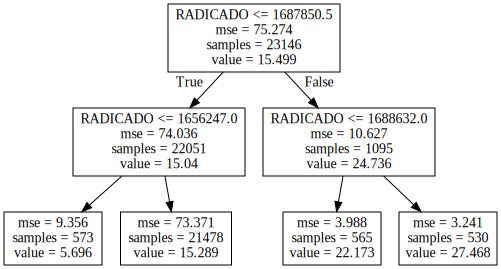

In [10]:
graphviz.Source(treedot)

nuestra mejor variable de predicion fue RADICADO

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor(200)
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [12]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9988625322898624
0.8614861198541603


Mejor resultado que Lasso! Y ano tenemos Bias y tenemos un mejor score r2. Sin embargo tenemos una diferencia importante entre score de entrenamiento y test(overfit)

# Gradient Boosted Trees

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [14]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9988593891563609
0.8593816190031148


# Optimización de hiperparámetros

Buenas practicas del Gradient Boosted Trees, siguiendo el modelo

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [16]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,501,20)}

In [17]:
list(param_test1['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

se hace por que con GridSearch se busca el mejor valor para la cantidad de estimadores 

In [18]:
estimador = GradientBoostingRegressor(learning_rate =0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=500,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10)

parametros de los arboles

In [19]:
gsearch1 = GridSearchCV(estimador,
                       param_grid = param_test1,
                       scoring='r2',
                       cv=5)

In [20]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=500,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
           

In [21]:
list(zip(gsearch1.cv_results_['mean_test_score'], gsearch1.cv_results_['std_test_score'], gsearch1.cv_results_['params']))

[(0.4386685893879768, 0.032002326300296535, {'n_estimators': 20}),
 (0.6869601526814682, 0.014269122129370095, {'n_estimators': 40}),
 (0.8009315206853358, 0.00608010605468979, {'n_estimators': 60}),
 (0.8586287073713124, 0.005107987466590427, {'n_estimators': 80}),
 (0.8856629953404106, 0.006755397068596115, {'n_estimators': 100}),
 (0.9031018723127391, 0.0038177312842833083, {'n_estimators': 120}),
 (0.913011249721443, 0.0029115678104229205, {'n_estimators': 140}),
 (0.9196773220325951, 0.002725161626736569, {'n_estimators': 160}),
 (0.9256231557972315, 0.0024999897298603802, {'n_estimators': 180}),
 (0.9296853038896653, 0.002280009483071475, {'n_estimators': 200}),
 (0.9333718527814814, 0.0021510882079417318, {'n_estimators': 220}),
 (0.9363299341489167, 0.002019463687601858, {'n_estimators': 240}),
 (0.9390482207004357, 0.0020207095108514318, {'n_estimators': 260}),
 (0.9409821477932665, 0.00190875075837754, {'n_estimators': 280}),
 (0.9431669407569869, 0.0017312619488343858, {'n_e

 mejoramos nuestro performarce 0.9499

In [22]:
final_results = cross_validate(gsearch1.best_estimator_,X_train,y_train)

In [23]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9988593891563609
0.8593816190031148


In [24]:
estimador = GradientBoostingRegressor(learning_rate =0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=500,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10,
                                     n_estimators=240)

In [25]:
estimador.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=500, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=240,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
estimador.score(X_test, y_test)

0.9445075534234584

Conclusion final

pasamos de un Score 0.70 a 0.94

en Score r2 gracias al haber trabajado sobre las features y tomar varios modelos y finalmente con gsearch1 al haber optimizado los parametros de nuestro modelo